In [1]:
!pip install yfinance

     |████████████████████████████████| 6.3MB 10.0MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.62-py2.py3-none-any.whl size=23867 sha256=82805b63afd832ce6ae8ddadca39e0e093e078380c9995baeaec638497931bb6
  Stored in directory: /root/.cache/pip/wheels/38/5c/4a/7266ab5120deea4efa7a6dd8f6f41e913b77500ec3397c9f01
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
import pandas.util.testing as tm
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """Entry point for launching an IPython kernel.


In [ ]:
start = '2020-12-30'
end = '2020-12-31'

#tickers = ['SNOW', 'CVX' ]
#tickers.sort()

data = yf.download("SNOW", period = "5d", interval = "5m")
#data = data.loc[:, ('Adj Close', slice(None))]
#data.columns = tickers
display(data.head())

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-07-02 09:30:00-04:00,239.500000,239.970001,238.229996,239.529999,239.529999,69374
2021-07-02 09:35:00-04:00,239.460007,241.125595,239.460007,240.914993,240.914993,86105
2021-07-02 09:40:00-04:00,240.949997,241.210007,239.699997,240.000000,240.000000,42605
2021-07-02 09:45:00-04:00,239.975006,240.529999,239.540100,240.035004,240.035004,42277
2021-07-02 09:50:00-04:00,240.029999,240.460007,239.427994,239.789993,239.789993,29117


In [ ]:
data["Adj close"].plot()

[*********************100%***********************]  3 of 3 completed


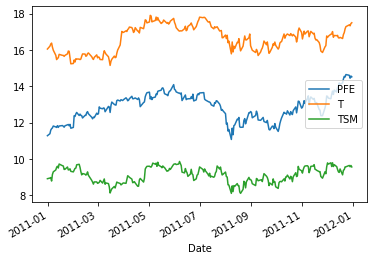

In [4]:
start = '2010-12-31'
end = '2011-12-31'

tickers = ['T', 'PFE', 'TSM']
tickers.sort()


data = yf.download(tickers, start=start, end=end)
data = data.loc[:, ('Adj Close', slice(None))]
data.columns = tickers

data.plot()

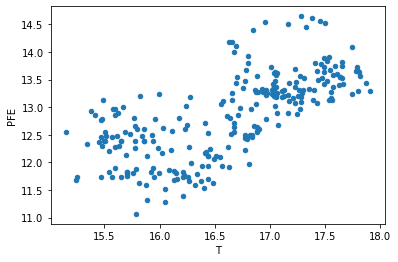

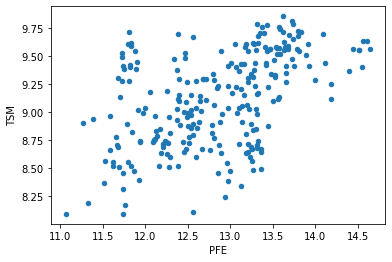

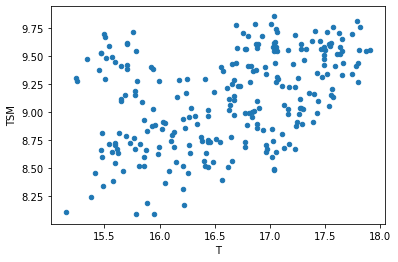

In [5]:
data.plot.scatter(x='T', y='PFE')
data.plot.scatter(x='PFE', y='TSM')
data.plot.scatter(x='T', y='TSM')

# ADF

In [30]:
import pandas.util.testing as tm
import statsmodels.formula.api as sm
import statsmodels.tsa.stattools as ts
import statsmodels.tsa.vector_ar.vecm as vm

In [7]:
df = data

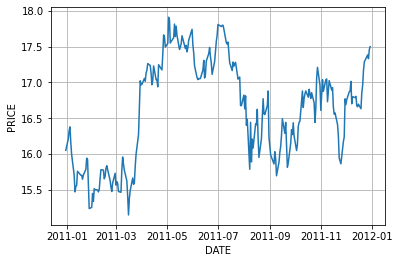

In [58]:
y=df['T']

plt.plot(y)
plt.ylabel('PRICE')
plt.xlabel('DATE')
plt.show
plt.grid()

In [59]:
results=adfuller(y, maxlag=1, regression='c', autolag='BIC')
print(results)

(-2.022132043598487, 0.2769540653281043, 0, 252, {'1%': -3.4565688966099373, '5%': -2.8730786194395455, '10%': -2.5729189953388762}, -117.6474862084662)


tc = -1.0277566738907857

HO = landa = 0
H1 = landa dif 0

Como el estadistico es -1.0277566738907857 y e lvalor critico al 90% es -2.5683 entoces no se rechaza la hipotesis nula, es decir, el activo no es estacionario.




In [12]:
H, pVal=genhurst(np.log(y))
print("H=%f pValue=%f" % (H, pVal))

H=0.414784 pValue=0.000000


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


el exponente de hurst 0<Husrt<0.5 presenta reversion a le media, en nuestro caso el valor es 0.42707 esto nos indica que hay una leve reversion a la media.

In [15]:
yport=pd.DataFrame(y)
ylag=yport.shift()
deltaY=yport-ylag
df2=pd.concat([ylag, deltaY], axis=1)
df2.columns=['ylag', 'deltaY']
regress_results=sm.ols(formula="deltaY ~ ylag", data=df2).fit() 
print(regress_results.params)

halflife=-np.log(2)/regress_results.params['ylag']
print('halflife=%f days' % halflife)

Intercept    0.569298
ylag        -0.033917
dtype: float64
halflife=20.436566 days


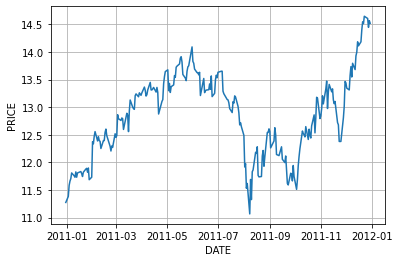

In [61]:
y=df['PFE']


plt.plot(y)
plt.ylabel('PRICE')
plt.xlabel('DATE')
plt.show
plt.grid()

In [62]:
results=adfuller(y, maxlag=1, regression='c', autolag='BIC')
print(results)

(-1.973328417642558, 0.2983886876361517, 0, 252, {'1%': -3.4565688966099373, '5%': -2.8730786194395455, '10%': -2.5729189953388762}, -109.66212501109777)


tc = -1.5259024121598233

HO = landa = 0
H1 = landa dif 0

Como el estadistico es -1.5259024121598233 y e lvalor critico al 90% es -2.5683 entoces no se  rechaza la hipotesis nula, es decir, el activo no es estacionario.

In [20]:
H, pVal=genhurst(np.log(y))
print("H=%f pValue=%f" % (H, pVal))

H=0.441653 pValue=0.000000


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


el exponente de hurst 0<Husrt<0.5 presenta reversion a le media, en nuestro caso el valor es 0.456971 esto nos indica que hay una leve reversion a la media.

In [23]:
yport=pd.DataFrame(y)
ylag=yport.shift()
deltaY=yport-ylag
df2=pd.concat([ylag, deltaY], axis=1)
df2.columns=['ylag', 'deltaY']
regress_results=sm.ols(formula="deltaY ~ ylag", data=df2).fit() 
print(regress_results.params)

halflife=-np.log(2)/regress_results.params['ylag']
print('halflife=%f days' % halflife)

Intercept    0.421489
ylag        -0.031828
dtype: float64
halflife=21.777682 days


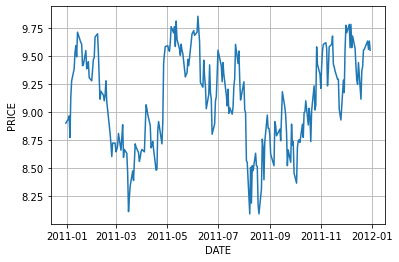

In [64]:
y=df['TSM']

plt.ylabel('PRICE')
plt.xlabel('DATE')
plt.plot(y)
plt.show
plt.grid()

In [65]:
results=adfuller(y, maxlag=1, regression='c', autolag='BIC')
print(results)

(-3.3157681519139652, 0.014188183320673358, 0, 252, {'1%': -3.4565688966099373, '5%': -2.8730786194395455, '10%': -2.5729189953388762}, -166.2855101394328)


tc = -0.5795830538280953

HO = landa = 0
H1 = landa dif 0

Como el estadistico es -0.5795830538280953 y e lvalor critico al 90% es -2.5683 entoces no se rechaza la hipotesis nula, es decir, el activo no es estacionario.

In [28]:
# Find Hurst exponent
H, pVal=genhurst(np.log(y))
print("H=%f pValue=%f" % (H, pVal))

H=0.346660 pValue=0.000000


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


el exponente de hurst 0<Husrt<0.5 presenta reversion a le media, en nuestro caso el valor es 0.371913  esto nos indica que hay una leve reversion a la media.

In [31]:
yport=pd.DataFrame(y)
ylag=yport.shift()
deltaY=yport-ylag
df2=pd.concat([ylag, deltaY], axis=1)
df2.columns=['ylag', 'deltaY']
regress_results=sm.ols(formula="deltaY ~ ylag", data=df2).fit() 
print(regress_results.params)

halflife=-np.log(2)/regress_results.params['ylag']
print('halflife=%f days' % halflife)

Intercept    0.785679
ylag        -0.085959
dtype: float64
halflife=8.063697 days


# POR

In [32]:
import pandas.util.testing as tm
import statsmodels.formula.api as sm
import statsmodels.tsa.stattools as ts
import statsmodels.tsa.vector_ar.vecm as vm

result=vm.coint_johansen(data.values, det_order=0, k_ar_diff=1)
print(result.lr1)
print(result.cvt)
print(result.lr2)
print(result.cvm)

[29.80252534 14.5017128   4.13494956]
[[27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
[15.30081255 10.36676324  4.13494956]
[[18.8928 21.1314 25.865 ]
 [12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]


Resultados de Johansen test

| Null |    | Trace Statistic  | 90%| 95% | 99% 
| :-: | :-: | :-: | :-: | :-: | :-: |
| r <= 0 | Variable 1 |29.80252534| 27.0669 | 29.7961 |35.4628
| r <= 1 | Variable 2 |14.5017128| 13.4294 |15.4943  | 19.9349
| r <= 2 | Variable 3 |4.13494956 | 2.7055  | 3.8415  | 6.6349





In [33]:
print(result.evec)

[[ 1.62651359  0.41249845  1.08331251]
 [-1.34864345 -1.44267611  0.31880034]
 [-1.82300751  2.2143908   0.19827977]]


In [34]:
print(result.evec[:, 0])
data.columns

[ 1.62651359 -1.34864345 -1.82300751]


Index(['PFE', 'T', 'TSM'], dtype='object')

Text(0.5, 0, 'DATE')

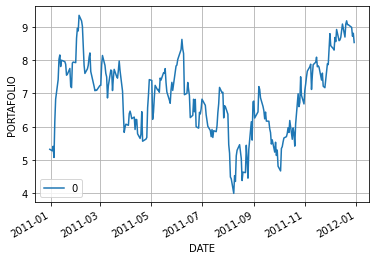

In [49]:
pd.DataFrame((-1.62651359*data['T']+1.34864345*data['PFE']+1.82300751*data['TSM'])).plot().grid()
plt.ylabel('PORTAFOLIO')
plt.xlabel('DATE')

In [50]:
y=(-1.62651359*df['T']+1.34864345*df['PFE']+1.82300751*df['TSM'])
results=adfuller(y, maxlag=1, regression='c', autolag='BIC')
print(results)

(-2.683136169767038, 0.0770021848338266, 0, 252, {'1%': -3.4565688966099373, '5%': -2.8730786194395455, '10%': -2.5729189953388762}, 241.10087027907417)


In [51]:
yport=pd.DataFrame(np.dot(df.values, result.evec[:, 0])) #  (net) market value of portfolio

ylag=yport.shift()
deltaY=yport-ylag
df2=pd.concat([ylag, deltaY], axis=1)
df2.columns=['ylag', 'deltaY']
regress_results=sm.ols(formula="deltaY ~ ylag", data=df2).fit() # Note this can deal with NaN in top row
print(regress_results.params)

halflife=-np.log(2)/regress_results.params['ylag']
print('halflife=%f days' % halflife)

Intercept   -1.318298
ylag        -0.073161
dtype: float64
halflife=9.474263 days


In [52]:
print(regress_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 deltaY   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     9.875
Date:                Fri, 09 Jul 2021   Prob (F-statistic):            0.00188
Time:                        23:15:17   Log-Likelihood:                -112.91
No. Observations:                 252   AIC:                             229.8
Df Residuals:                     250   BIC:                             236.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3183      0.423     -3.117      0.0

Text(0.5, 0, 'DAYS')

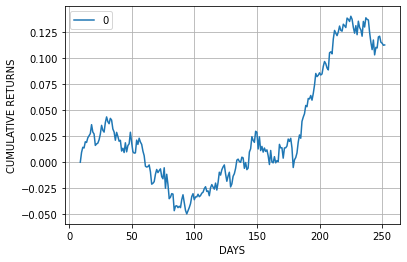

In [56]:
lookback=np.round(halflife).astype(int) #  setting lookback to the halflife found above
numUnits =-(yport-yport.rolling(lookback).mean())/yport.rolling(lookback).std() # capital invested in portfolio in dollars.  movingAvg and movingStd are functions from epchan.com/book2
positions=pd.DataFrame(np.dot(numUnits.values, np.expand_dims(result.evec[:, 0], axis=1).T)*df.values) # results.evec(:, 1)' can be viewed as the capital allocation, while positions is the dollar capital in each ETF.
pnl=np.sum((positions.shift().values)*(df.pct_change().values), axis=1) # daily P&L of the strategy
ret=pnl/np.sum(np.abs(positions.shift()), axis=1)
pd.DataFrame((np.cumprod(1+ret)-1)).plot().grid()
plt.ylabel('CUMULATIVE RETURNS')
plt.xlabel('DAYS')

In [54]:
print('APR=%f Sharpe=%f' % (np.prod(1+ret)**(252/len(ret))-1, np.sqrt(252)*np.mean(ret)/np.std(ret)))

APR=0.112103 Sharpe=1.113592


In [27]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt # For debug only

def genhurst(z):
# =============================================================================
# calculation of Hurst exponent given log price series z
# =============================================================================
    z=pd.DataFrame(z)
    
    taus=np.arange(np.round(len(z)/10)).astype(int) # We cannot use tau that is of same magnitude of time series length 
    logVar=np.empty(len(taus)) # log variance

    for tau in taus:
        logVar[tau]=np.log(z.diff(tau).var(ddof=0))
        
    X=np.log(taus)    
    Y=logVar[:len(taus)]
    X=X[np.isfinite(logVar)]
    Y=Y[np.isfinite(logVar)]
#    pd.DataFrame(np.asmatrix([X, Y]).T).to_csv('XY.csv')

    X = sm.add_constant(X)
#    plt.scatter(X[:,1], Y) # for debug only
    model=sm.OLS(Y, X)
    results=model.fit()
    H=results.params[1]/2
    pVal=results.pvalues[1]
    return H, pVal 